In [1]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import os
import milopy.core as milo

In [ ]:

# https://sc-dandelion.readthedocs.io/en/latest/notebooks/Q5-psuedobulk.html

## Fetal BCR Data

In [2]:
# using mode B - skip this step if pseudobulk is run above

preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")

GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
#                                       productive_cols = ["productive_VDJ", "productive_VJ"]
                                        productive_vdj = False,
                                        productive_vj = False
                                       )

# negative filtering
GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B", "PLASMA_B", "LATE_PRO_B", "PRO_B", "PRE_PRO_B"])] 
# GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 



In [3]:
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=30)
# sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)


C:\Users\chris\anaconda\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
C:\Users\chris\anaconda\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
C:\Users\chris\anaconda\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to t

In [4]:
milo.make_nhoods(GEX_adata, prop=0.1)
# milo.make_nhoods(GEX_adata, prop=0.1)

(array([ 2.,  0.,  2.,  2.,  4.,  0.,  3.,  4.,  5.,  4.,  6.,  0., 12.,
         9.,  6.,  6.,  0., 11.,  7.,  7.,  4.,  7.,  0., 10.,  7.,  8.,
         3.,  0.,  9.,  3.,  7.,  6.,  7.,  0.,  5., 11.,  4.,  4.,  0.,
         6.,  6.,  5.,  5.,  2.,  0.,  4.,  3.,  4.,  3.,  0.,  2.,  1.,
         2.,  3.,  2.,  0.,  3.,  2.,  3.,  3.,  1.,  0.,  0.,  0.,  3.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 32.        ,  32.81999969,  33.63999939,  34.45999908,
         35.27999878,  36.09999847,  36.91999817,  37.74000168,
         38.56000137,  39.38000107,  40.20000076,  41.02000046,
         41.84000015,  42.65999985,  43.47999954,  44.29999924,
         45.11999893,  45.93999863,  46.75999832,  47.58000183,
         48.40000153,  49.22000122,  50.04000092,  50.86000061,
         51.68000031,  52.5       ,  53.31999969, 

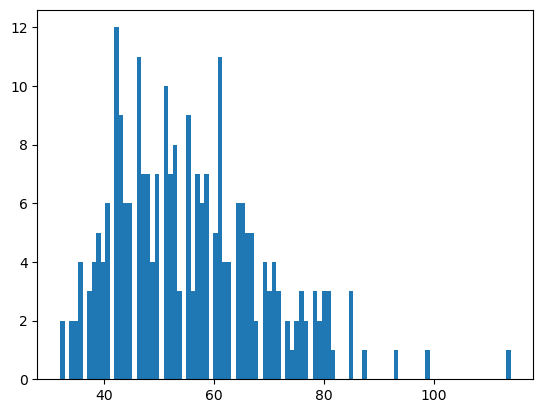

In [5]:
import matplotlib.pyplot as plt
nhood_size = np.array(GEX_adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100)

In [87]:
sc.tl.umap(GEX_adata)

pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", extract_cols=None
)

C:\Users\chris\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


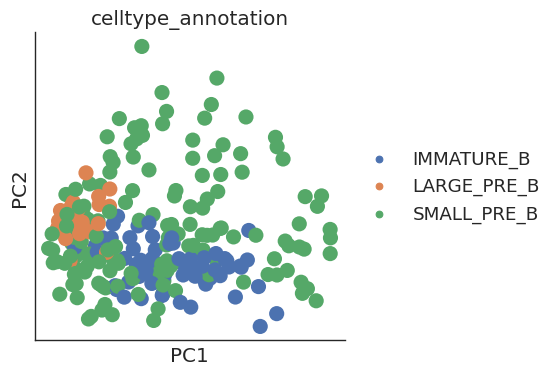

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


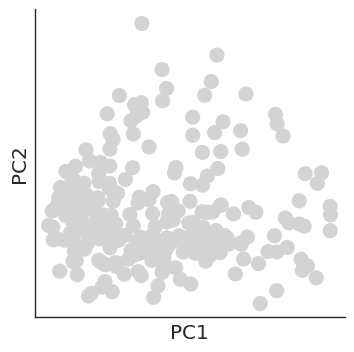

C:\Users\chris\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.


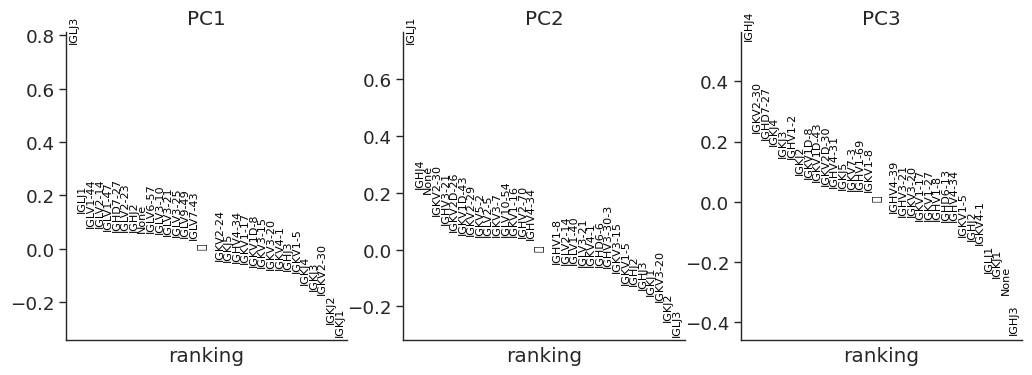

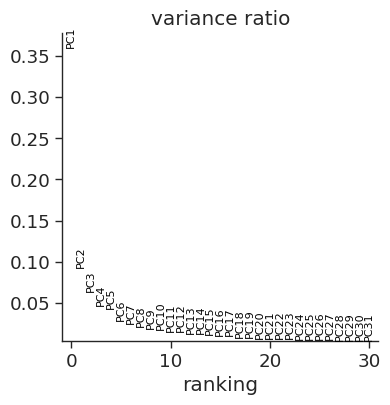

In [88]:
# compute PCA

sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")
sc.pl.pca_overview(pb_GEX_adata)

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


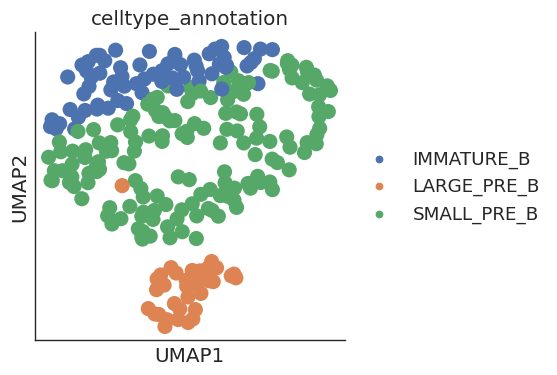

In [89]:
sc.pp.neighbors(pb_GEX_adata)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation")

In [90]:
rootcell = pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obs_names[
            np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_umap"][:, 1])
        ]

rootcell

'37'

In [91]:
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_umap"][:, 1]),
        ]
    ],
)

terminal_states


222    IMMATURE_B
dtype: object

In [92]:
terminal_states.index[0]

'222'

In [100]:
pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names

Index(['1', '2', '3', '4', '5', '6', '7', '9', '10', '11', '22', '23', '24',
       '33', '36', '42', '43', '65', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '98', '120', '172', '173',
       '174', '175', '176', '177', '178', '179', '180', '181', '182', '183',
       '184', '185', '186', '188', '189', '207', '212', '217', '218', '222',
       '228', '230', '243', '245', '247', '248', '249', '250', '251'],
      dtype='object')

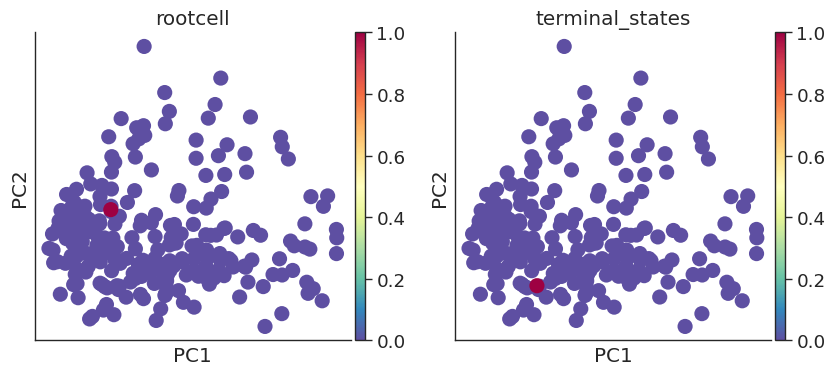

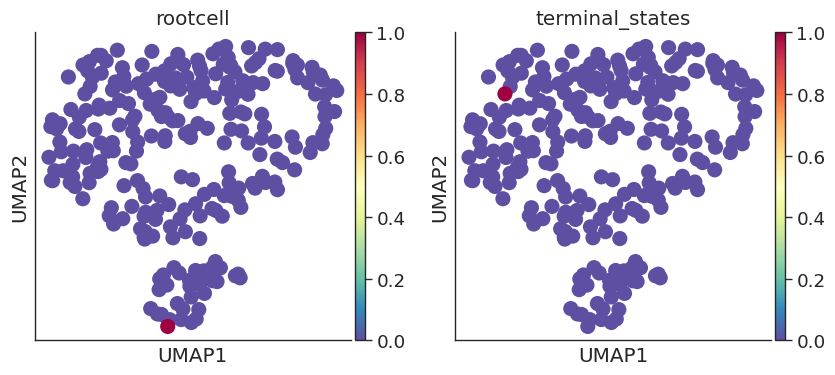

In [109]:
pb_GEX_adata.obs["rootcell"] = 0
pb_GEX_adata.obs["terminal_states"] = 0
pb_GEX_adata.obs.at[str(rootcell), "rootcell"] = 1
# pb_GEX_adata.obs.at[terminal_states.index[0], "terminal_states"] = 1

pb_GEX_adata.obs.at['77', "terminal_states"] = 1
sc.pl.pca(pb_GEX_adata, color = ["rootcell","terminal_states"])
sc.pl.umap(pb_GEX_adata, color = ["rootcell", "terminal_states"])

In [105]:
import milopy.core as milo
import palantir

# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

pr_res = palantir.core.run_palantir(
    ms_data,
    rootcell,
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]


Determing nearest neighbor graph...
Sampling and flocking waypoints...
Time for determining waypoints: 0.0005942424138387044 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.615629506111145 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


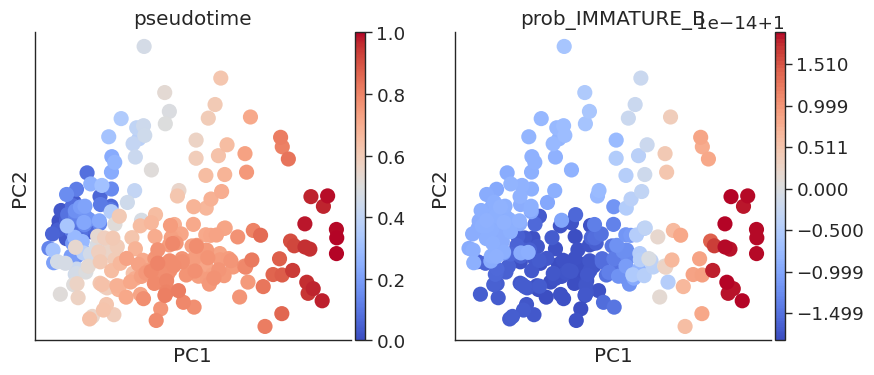

In [106]:
pb_GEX_adata = ddl.tl.pseudotime_transfer(pb_GEX_adata, pr_res)
sc.pl.pca(
    pb_GEX_adata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

number of cells removed due to not belonging to any neighbourhood 53


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


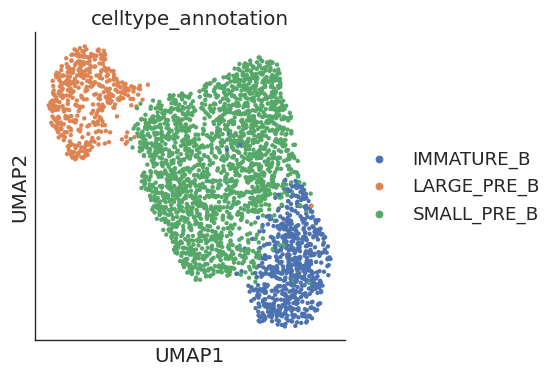

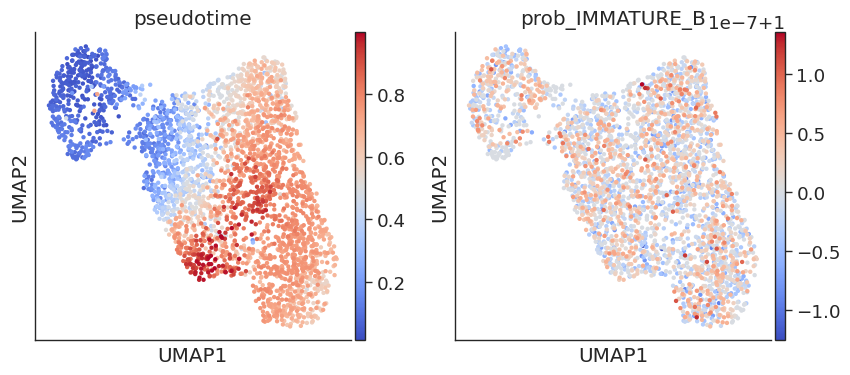

In [107]:
bdata = ddl.tl.project_pseudotime_to_cell(
    GEX_adata, pb_GEX_adata, terminal_states.values
)
sc.pl.umap(bdata, color=["celltype_annotation"])
sc.pl.umap(
    bdata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
)

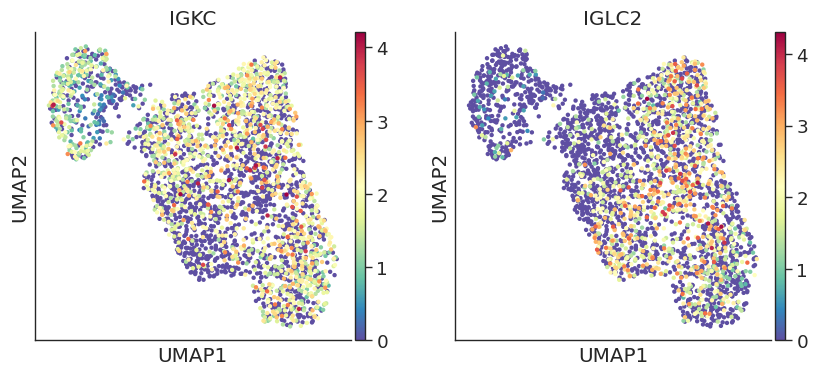

In [108]:
sc.pl.umap(bdata, color = ["IGKC", "IGLC2"])

We firstly subset it to immature, pro-b, late pro-b, 

we did a pseduobulk
we asked the bcr recombination events
we set the root cell to be late pro-b, because thats is the arliest cell type
limitation of the tool - not clear cut - to figure out whether we need to add the backward edges & what are the right condition for this to work.
remove the pro-b stage - start on large pre-b (the stage next to pro-b). 


In [185]:
rootcell = np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_pca"][:, 1])
rootcell


60

In [203]:
terminal_states2 = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 0]),
        ]
    ],
)

terminal_states2


285    IMMATURE_B
dtype: object

In [191]:
pb_GEX_adata.obs_names[rootcell2]

'60'

In [193]:
# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)



Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [200]:
pca_projections

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.203384,0.066118,-0.019299,0.074359,0.072966,0.235087,-0.009316,0.057776,-0.138756,0.082495,...,0.023952,0.068594,-0.008128,-0.000447,0.013244,-0.019588,0.026054,0.006130,-0.009429,-0.021647
1,-0.219661,0.008141,-0.104398,-0.073749,0.130596,0.181977,-0.091989,-0.045121,-0.121146,0.014724,...,0.002329,-0.020504,0.037447,0.008029,-0.019284,0.004894,0.021538,-0.029007,-0.004227,-0.012387
2,-0.176686,0.131219,-0.115084,-0.098279,-0.183478,-0.025750,-0.068690,0.012620,0.039824,0.012443,...,-0.002132,0.008277,-0.003800,0.023228,0.003303,-0.010994,-0.001660,0.037938,0.029978,0.031543
3,0.239101,0.049458,-0.039346,-0.160146,0.051447,-0.016459,-0.017869,0.032290,0.002369,0.084297,...,-0.037220,-0.012900,-0.015025,-0.035683,-0.008939,0.025771,-0.040536,-0.015673,-0.004801,-0.025971
4,0.131301,0.058554,-0.163692,-0.008686,-0.043584,0.043995,0.030543,0.023166,0.074964,-0.048997,...,-0.016027,0.004139,0.026593,-0.007452,0.029026,0.063361,-0.035901,-0.004479,-0.018617,-0.002284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.152734,-0.115256,-0.030574,0.012831,0.006590,0.010706,-0.089132,0.011789,-0.015335,0.084514,...,-0.030389,-0.000139,-0.013138,0.028756,-0.012627,-0.019573,-0.011751,0.009545,0.014182,0.005605
556,-0.098528,0.032162,-0.023655,-0.169593,0.119998,-0.053322,-0.064464,0.100977,-0.065947,0.059309,...,-0.025144,0.004386,0.002257,0.017159,0.009752,-0.016960,0.022629,0.001934,0.033872,-0.026783
557,0.107356,-0.035825,-0.046445,-0.086304,-0.017552,-0.067904,-0.107506,-0.014688,-0.040481,0.009816,...,0.000767,-0.016074,-0.003753,0.040646,-0.013652,-0.009954,0.007753,0.015165,0.008357,0.004780
558,0.247858,0.056099,-0.064373,-0.067969,0.018646,0.036239,0.173522,0.010654,0.090581,0.066952,...,-0.028330,-0.013634,0.007762,0.066367,-0.054995,-0.019748,-0.012227,-0.043992,-0.014026,0.036725


In [198]:
ms_data

""
0
1
2
3
4
...
555
556
557
558


In [195]:
pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEX_adata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states2.index,
)

#pr_res.branch_probs.columns = terminal_states2[pr_res.branch_probs.columns]

ValueError: at least one array or dtype is required

In [162]:
pb_GEX_adata.obs_names[60]

'60'